Business Objective:
Predicting whether a customer will churn (StateNextMonth) and identifying key factors influencing churn to help reduce customer loss.

In [1]:
import pandas as pd

In [2]:
#Loading the data.
df=pd.read_csv("telco_TS.csv")

In [3]:
#EDA.

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,State,StateNextMonth
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No Churn,No Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No Churn,No Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churn,No Churn
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No Churn,No Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churn,Churn


In [5]:
df.shape

(7043, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'State',
       'StateNextMonth'],
      dtype='object')

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,State,StateNextMonth
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No Churn,No Churn
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174,4381


In [10]:
df.isnull().sum

<bound method DataFrame.sum of       customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          F

In [11]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool>

In [12]:
df['StateNextMonth'].value_counts()

StateNextMonth
No Churn    4381
Churn       2662
Name: count, dtype: int64

In [13]:
#Finding in terms of percentage.
df['StateNextMonth'].value_counts(normalize=True) * 100

StateNextMonth
No Churn    62.203606
Churn       37.796394
Name: proportion, dtype: float64

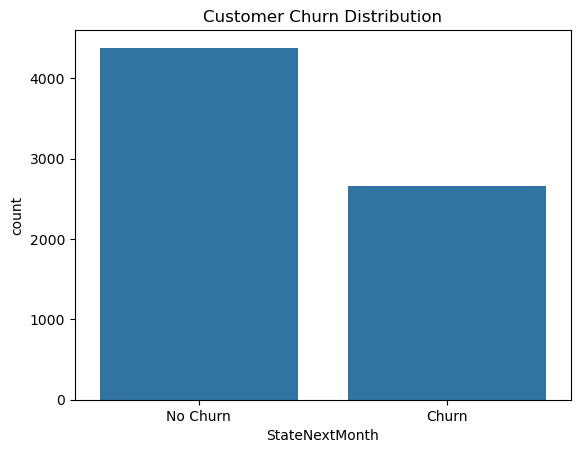

In [14]:
#Visualization.
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='StateNextMonth', data=df)
plt.title("Customer Churn Distribution")
plt.show()

In [15]:
#Dropping non-informative columns.
df.drop(columns=['customerID'], inplace=True)

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
State                object
StateNextMonth       object
dtype: object

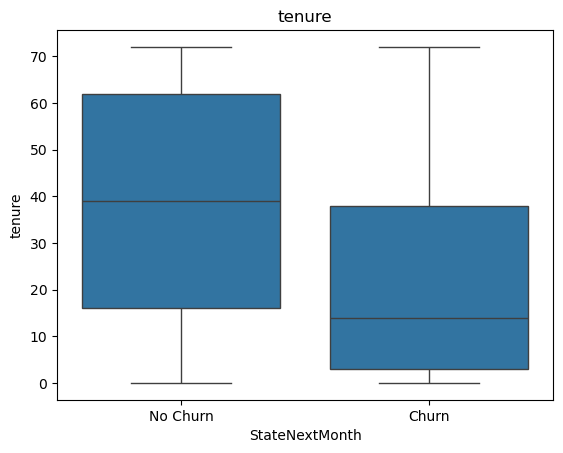

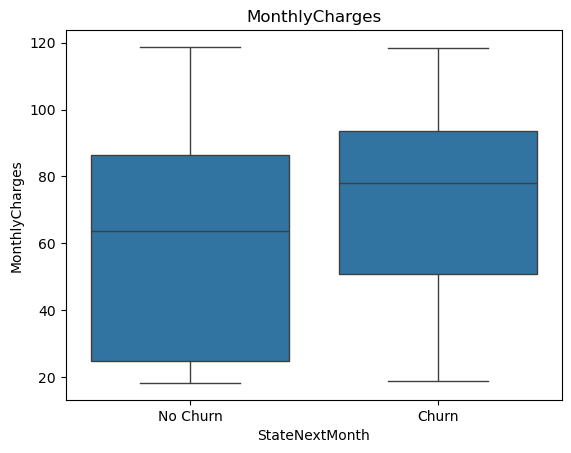

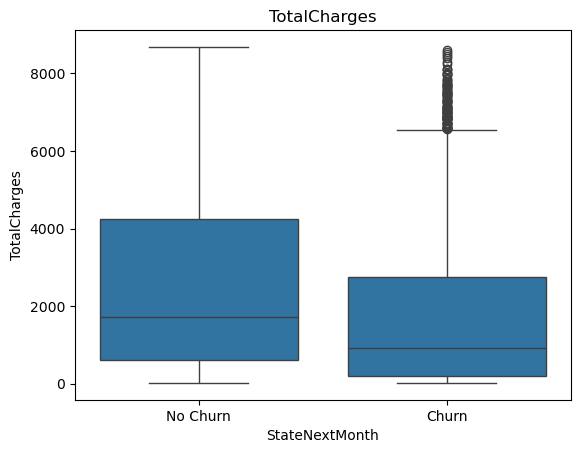

In [17]:
#Feature vs Churn Analysis.
#Numerical Features.
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    sns.boxplot(x='StateNextMonth', y=col, data=df)
    plt.title(col)
    plt.show()

Key Observations from Numerical Features.

- Customers with shorter tenure are significantly more likely to churn.
- Higher monthly charges are associated with increased churn.
- Customers who do not churn tend to have higher total charges, indicating higher lifetime value.


In [18]:
#Categorical Features.
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'State', 'StateNextMonth'],
      dtype='object')

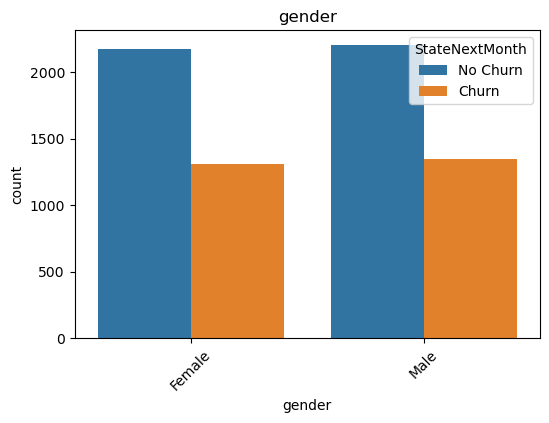

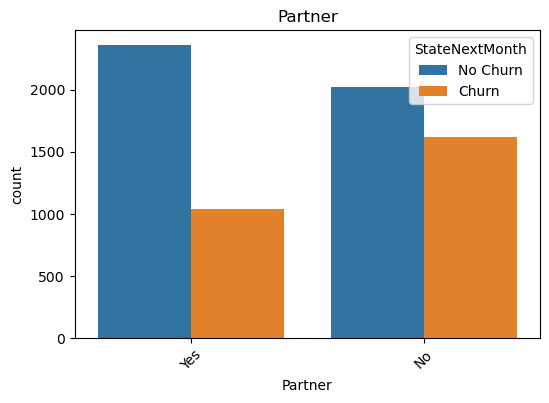

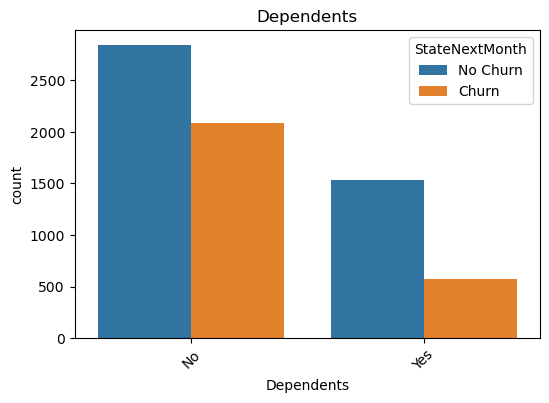

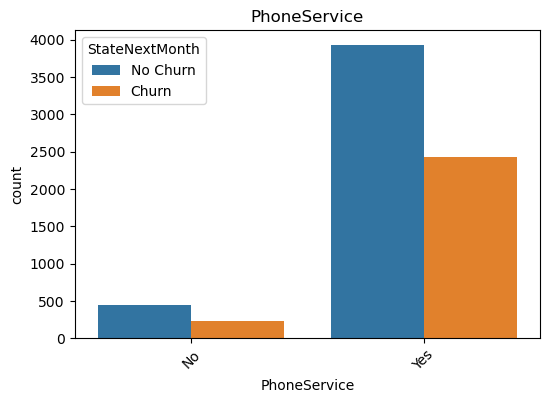

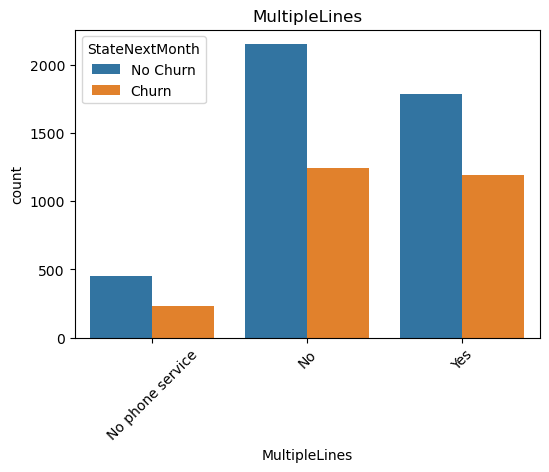

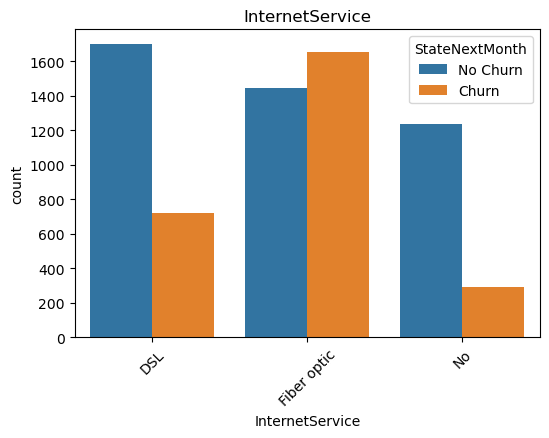

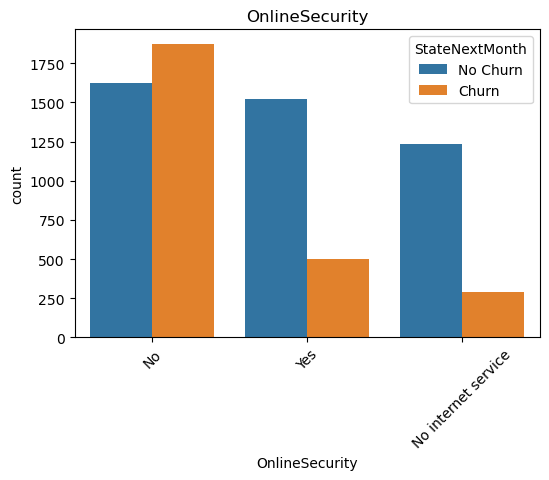

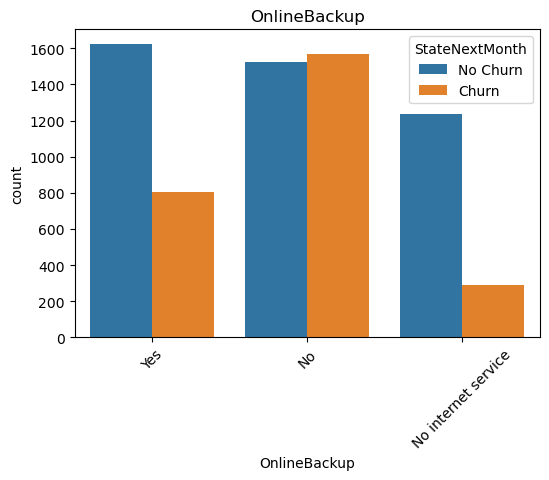

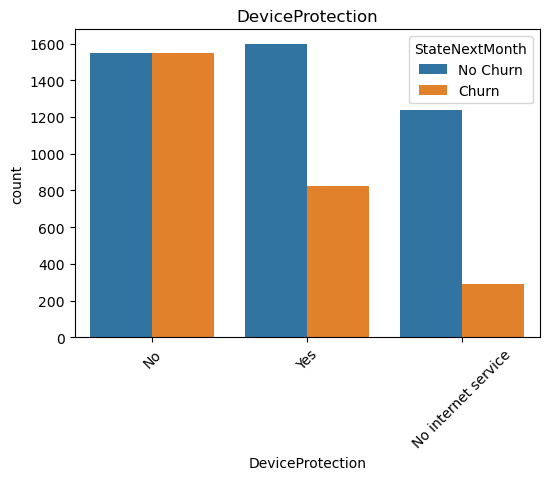

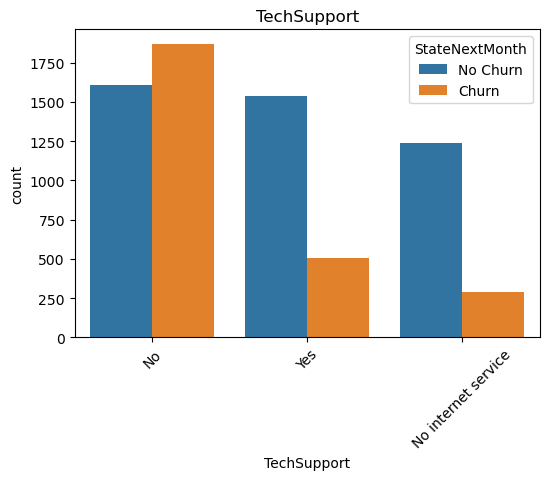

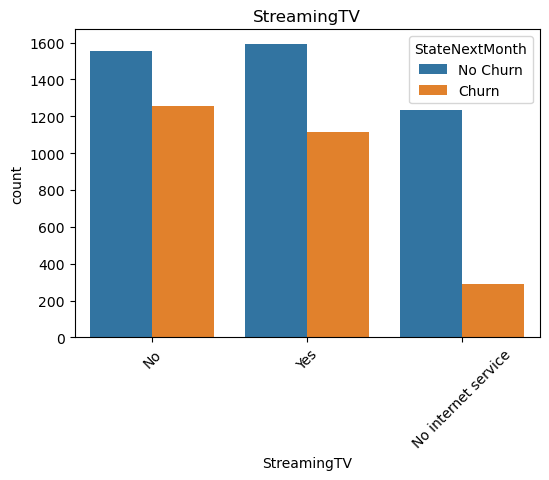

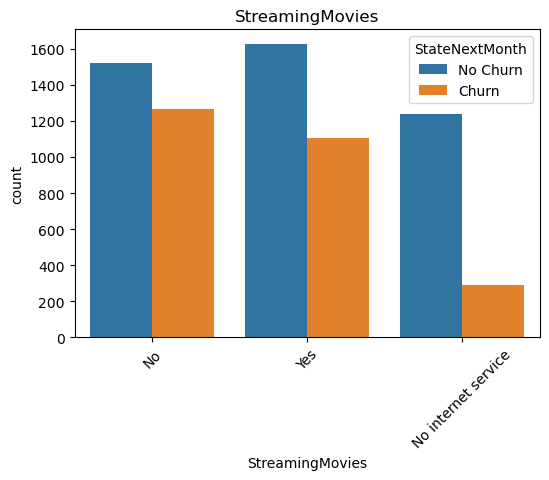

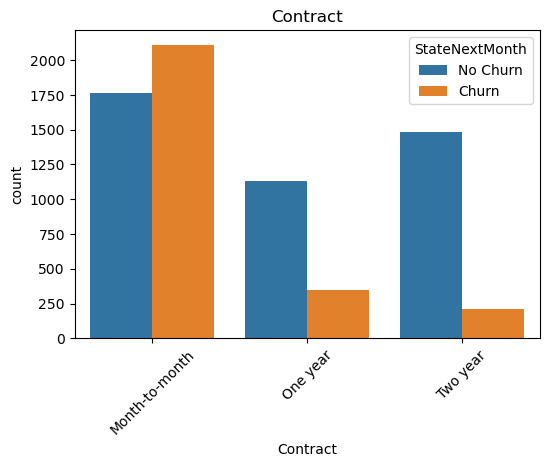

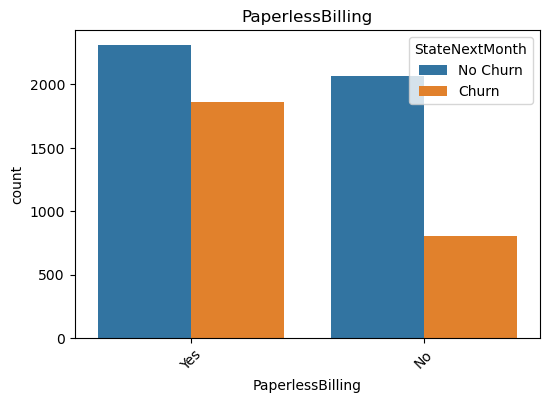

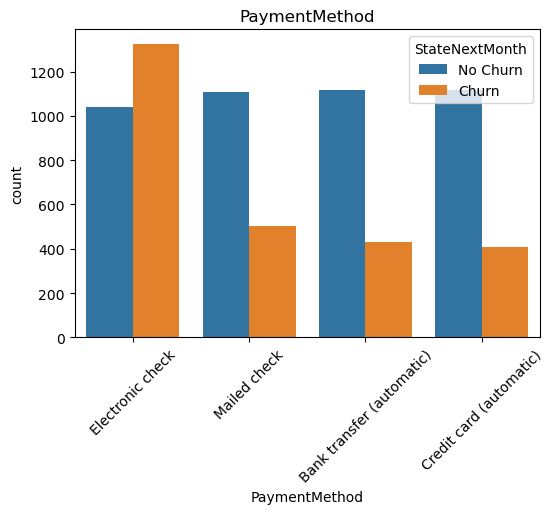

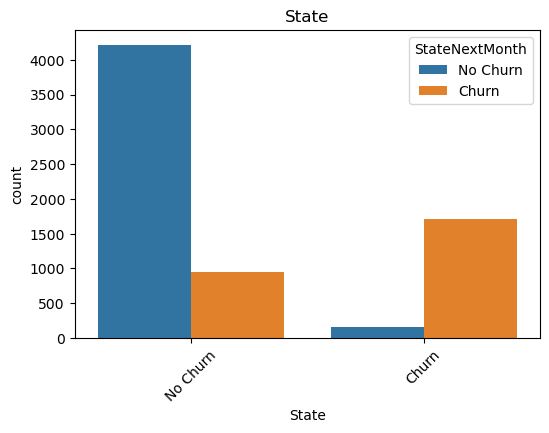

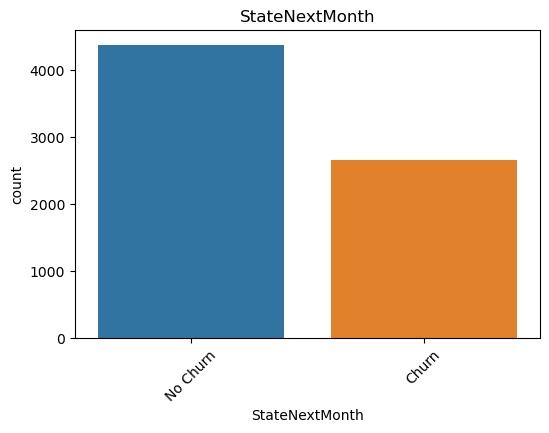

In [19]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='StateNextMonth', data=df)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

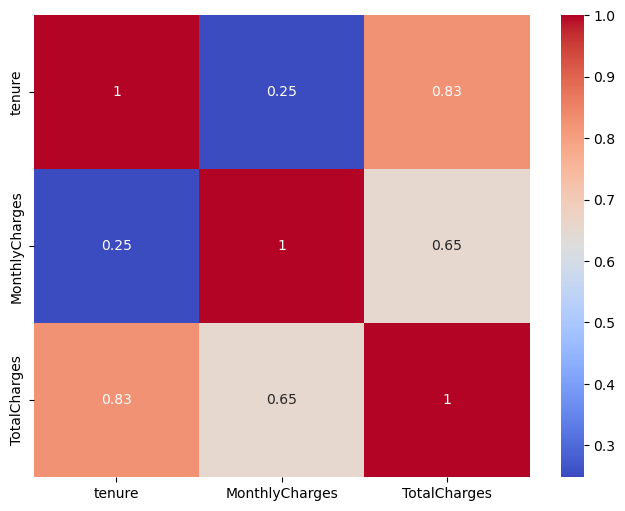

In [20]:
# Correlation (Numeric).
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

In [21]:
#Separating the target for encoding.
y = df['StateNextMonth'].map({'Churn': 1, 'No Churn': 0})
df = df.drop('StateNextMonth', axis=1)

In [22]:
#Binary Encoding.
binary_cols = ['gender','Partner','Dependents','PhoneService','PaperlessBilling']

for col in binary_cols:
    df[col] = df[col].map({
        'Yes': 1, 'No': 0,
        'Male': 1, 'Female': 0
    })

In [23]:
#One-hot encoding.
df = pd.get_dummies(df, drop_first=True)

In [25]:
#Scaling.
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [26]:
#Standard Scaler.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [27]:
#Train-Test Split.
from sklearn.model_selection import train_test_split

X = df
y = y  # from earlier step

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [28]:
#Baeline Model. Logistic Regression.
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
#Model Evaluation.
y_pred = model.predict(X_test)

In [30]:
#Metrics.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8516678495386799

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       876
           1       0.92      0.66      0.77       533

    accuracy                           0.85      1409
   macro avg       0.87      0.81      0.83      1409
weighted avg       0.86      0.85      0.85      1409



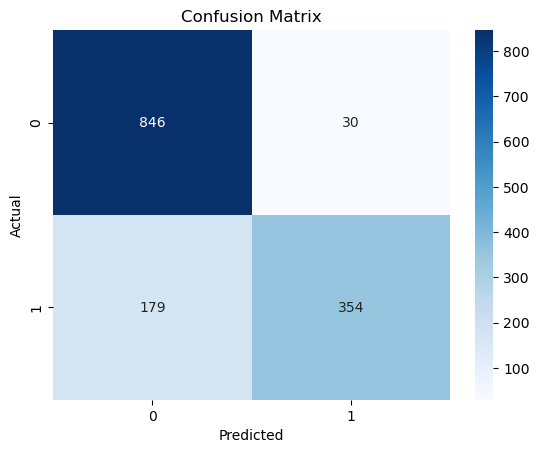

In [31]:
#Confusion Matrix.
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
#Interpretability.
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)

,Feature,Coefficient
11,InternetService_Fiber optic,0.264820
10,MultipleLines_Yes,0.170420
28,PaymentMethod_Electronic check,0.169123
22,StreamingTV_Yes,0.106321
9,MultipleLines_No phone service,0.085199
8,TotalCharges,0.076617
6,PaperlessBilling,0.071555
5,PhoneService,0.065374
7,MonthlyCharges,0.063913
3,Dependents,0.040118


The feature importance analysis using Logistic Regression coefficients showed that internet service type, payment method and multiple line subscriptions significantly influence customer churn. Customers using fiber optic internet and electronic check payment methods showed a higher chance of churn. Also, higher service usage and billing-related factors contributed moderately to churn behavior.